In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [285]:
import sqlite3
sql = sqlite3.connect('trains.db')

### easy  
##### придумать небольшую базу данных  
таблицы:
1. список поездов
2. список проводников
3. список маршрутов
4. список пассажиров

In [286]:
t_name = ["red_arrow", "blue_arrow", "green_arrow", "black_arrow"]
trains_df = pd.DataFrame({'t_name':t_name})
trains_df

,t_name
0,red_arrow
1,blue_arrow
2,green_arrow
3,black_arrow


In [287]:
conductors = ["Ivanov", "Petrov", "Sidorov", "Andreev"]
c_train = [2,0,3,1]
conductors_df = pd.DataFrame({'c_name':conductors, 'c_train':c_train})
conductors_df

,c_name,c_train
0,Ivanov,2
1,Petrov,0
2,Sidorov,3
3,Andreev,1


In [288]:
routs = ["Arhangel'sk", "Habarovsk", "Irkutsk", "Volgograd", "Ufa"]

r_date = [datetime.date(2021,10,10), datetime.date(2021,10,10), datetime.date(2021,11,11), datetime.date(2021,5,5), datetime.date(2021,12,12)]
routs_df = pd.DataFrame({'routs':routs, 'r_date':r_date})
routs_df

,routs,r_date
0,Arhangel'sk,2021-10-10
1,Habarovsk,2021-10-10
2,Irkutsk,2021-11-11
3,Volgograd,2021-05-05
4,Ufa,2021-12-12


In [289]:
passengers =['pas1', 'pas2', 'pas3', 'pas4', 'pas5', 'pas6', 'pas7', 'pas8', 'pas9','pas10', 'pas11', 'pas12', 'pas13','pas14', 'pas15', 'pas16',
'pas17', 'pas18', 'pas19', 'pas20', 'pas21', 'pas22', 'pas23', 'pas24', 'pas25']
train_ids = np.random.randint(0, 4, size=25)
route_ids = np.random.randint(0, 5, size=25)
passengers_df = pd.DataFrame({'passengers':passengers, 'p_train':train_ids, 'p_route':route_ids})
passengers_df

,passengers,p_train,p_route
0,pas1,2,3
1,pas2,2,1
2,pas3,2,3
3,pas4,2,3
4,pas5,1,0
5,pas6,2,3
6,pas7,1,4
7,pas8,3,0
8,pas9,1,2
9,pas10,1,0


запись таблиц в SQL

In [290]:
trains_df.to_sql('trains', sql, index_label="id", if_exists='replace')
conductors_df.to_sql('conductors', sql, index_label="id", if_exists='replace')
routs_df.to_sql('routs', sql, index_label="id", if_exists='replace')
passengers_df.to_sql('passengers', sql, index_label="id", if_exists='replace')

##### выгрузить данные и отфильтровать их по какому-то значению 
список пассажиров, направляющихся в Иркутск (маршрут 2)

In [291]:
pd.read_sql("SELECT passengers FROM passengers WHERE p_route=2", sql)

,passengers
0,pas9
1,pas18
2,pas20
3,pas23
4,pas25


### normal  
##### Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация
вывести для пассажира 13 (pas13) пункт назначения, дату отъезда, название поезда и имя проводника

In [292]:
spravka = """
SELECT p.passengers as passenger,
r.routs as rout,
r.r_date as date,
t.t_name as train,
c.c_name as conductor
FROM passengers as p
JOIN routs as r ON r.id = p.p_route
JOIN trains as t ON t.id = p.p_train
JOIN conductors as c ON t.id = c.c_train
WHERE p.passengers='pas13'
"""
pd.read_sql(spravka, sql)

,passenger,rout,date,train,conductor
0,pas13,Habarovsk,2021-10-10,black_arrow,Sidorov


### hard  
##### Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.
сравнить загруженность проводников за период октябрь-нобярь 2021 (по количеству обслуживаемых пассажиров)

список проводников и пассажиров, работающих/путешествующих в указанный период

In [293]:
wl1 = """
SELECT
r.r_date as date,
c.c_name as conductor,
p.passengers as passenger
FROM passengers as p
JOIN routs as r ON r.id = p.p_route
JOIN conductors as c ON p.p_train = c.c_train
WHERE r.r_date>="2021-10-01" AND r.r_date<="2021-11-30" 
"""
pd.read_sql(wl1, sql)

,date,conductor,passenger
0,2021-10-10,Ivanov,pas2
1,2021-10-10,Andreev,pas5
2,2021-10-10,Sidorov,pas8
3,2021-11-11,Andreev,pas9
4,2021-10-10,Andreev,pas10
5,2021-10-10,Sidorov,pas11
6,2021-10-10,Sidorov,pas13
7,2021-10-10,Andreev,pas14
8,2021-11-11,Andreev,pas18
9,2021-11-11,Petrov,pas20


расчёт количества пассажиров на каждого проводника, выбор самого загруженного

           passenger
conductor           
Andreev            6
Ivanov             3
Petrov             2
Sidorov            3

passenger    6
Name: Andreev, dtype: int64



<AxesSubplot:xlabel='conductor'>

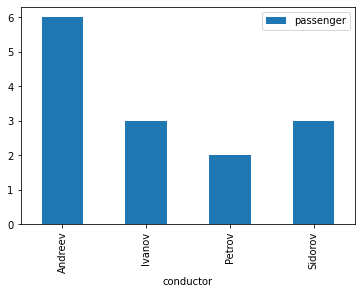

In [294]:
wl = pd.read_sql(wl1, sql)
wl = (wl[['conductor','passenger']]).groupby(['conductor']).count()

ccc = (wl[wl['passenger']==int((wl['passenger']).max())]).iloc[0]
#ccc = wl.loc[wl['passenger'] == int((wl['passenger']).max())]['conductor'].values[0]

print(wl)
print()
print(ccc)
print()
wl.plot.bar()